<center>
    
## <font color='maroon'>ASTR 21100/31200</font>
## <font color='maroon'>Computational techniques in astrophysics<br></font>

## <font color='maroon'>Numerical computation of integrals<br></font>
</center>



### Instructor: 
Andrey Kravtsov (email: <tt>kravtsov@uchicago.edu</tt>)
Professor,<br> Department of Astronomy & Astrophysics

### <font color='darkblue'>We will consider specific examples where derivatives and integrals need to be computed numerically 

For the integration example, we will spectically consider how to compute distance modulus of supernovae type Ia stars vs the shift of their spectral lines (redshift) - namely how to compute a line shown in the plot below from a recent paper. If you are not familiar with these astro terms, don't be scared! First, you can find background information about distance measurements in the auxiliary notebook 03b_cosmological_distances. Second, even if you don't understand the astro meaning of the computed quantity, you can think of it as simply computing an integral of an algebraic function for which no simple integral solution exists. 

Comparison of models to data shown in this plot  from <a href="https://ui.adsabs.harvard.edu/abs/2012ApJ...746...85S/abstract">Suzuki et al. 2012</a>, which uses many observational samples of <a href="https://en.wikipedia.org/wiki/Type_Ia_supernova">type Ia supernovae</a>, allows us to learn about the contents of our Universe.

<br>
<center><img width=500 src="https://astro.uchicago.edu/~andrey/classes/a211/img/suzuki_etal12_hubble_diagram.png"></img></center>
    


### <font color='darkblue'>The distance modulus

The *distance modulus* - the difference of the observed *apparent magnitude* $m$ and *absolute magnitude* $M$ is a function of distance $d_L$ to the object (see <a href="https://drive.google.com/file/d/15xe3tfourEjM0xFhzJhLDxobnOwl34pA/view?usp=sharing">03b_cosmological_distances</a> notebook): 

$$\mu = m - M = 5\log_{10}d_L(z) + 25.$$

where $d_L(z, H_0, \Omega_{\rm m}, \Omega_\Lambda)$ is in Megaparsecs, which depends on redshift $z$ and cosmological parameters describing our Universe: the Hubble constant, dimensionless mean density of matter $\Omega_{\rm m}$, and dimensionless mean density of dark energy \Omega_\Lambda. 
    

### <font color='darkblue'>What is integration?

Numerical integration of a function, $f(x,\ldots)$ over a single variable, $x$ (1d integration) over interval $[a,b]$:

$$\int\limits_a^b f(x) dx,$$

is evaluation of the area under $f(x)$, in which regions of $f(x)<0$ contribute negative areas and regions of $f(x)>0$ contribute positive areas. For example, $\int_0^{2\pi}\cos x\,dx = 0$ because it includes equal contributions from the negative and positive values of cosine. 

If an integral has "analytic expression" or, as is often said, "can be expressed in closed form," we can simply use such expression to evaluate it. 

For example, $\int \sin x\,dx = -\cos x + {\rm const}$, and so 

$$\int\limits_0^{\pi}\sin x\,dx = -\cos\pi +\cos 0 = 1 + 1 =2.$$ 

### <font color='darkblue'>Numerical integration is often called numerical *quadrature*

The origin of this term goes back to the Greek philosopher/mathematician <a href="https://plato.stanford.edu/entries/anaxagoras/">Anaxagoras</a>, who lived in the 5th century BC and was inprisoned for claiming that the Sun is not a god, but a hot, flowing stone in space and occupied his time in prison trying to solve the problem of finding a side length of a square that had the same area as a circle (i.e. he was trying <a href="https://en.wikipedia.org/wiki/Squaring_the_circle">"to square a circle"</a> - the problem that occupied many mathematicians after Anaxagoras). 

More generally, one can think of computing $\int_a^b f(x)dx$ as finding side lengths of quadrangle that has the same area as the area under the curve $f(x)$ for $x\in [a,b]$. Hence, the term *quadrature* and <tt>QUAD</tt> in the name of <tt>QUADPACK</tt> library. 

If we take one of the quadrangle sides to be $(b-a)$, then the integration is the problem of finding the length of the other side, which can be thought of some sort of weighted average of $f(x)$ over the interval $[a,b]$. 

We can explore integration function in the <a href="https://docs.scipy.org/doc/scipy/reference/integrate.html">scipy.integrate</a> package.

For example, let's check the integration for an integral, for which we know the exact answer:

$$\int\limits_0^1 e^x\, dx=e^x\vert_0^1=e - 1$$

In [1]:
# check using numerical integration
import numpy as np
from scipy.integrate import romberg

integral = romberg(np.exp, 0., 1., tol=2.e-17, rtol=2.e-17) 
fracerr = integral/(np.exp(1)-1) - 1.
print('integral = {:.4g}; frac. error = {:4g}'.format(integral, fracerr))

integral = 1.718; frac. error = 2.22045e-16


<tt>frac. error</tt> here is a *fractional error* of the integral estimated using a numerical method:

$$\epsilon = \frac{A_{\rm numerical} - A_{\rm exact}}{A_{\rm exact}} = \frac{A_{\rm numerical}}{A_{\rm exact}}-1$$

The simplest approach: approximate the integral as area under the rectangle with vertices $[a,0]$, $[a, \bar{f}]$, $[b,\bar{f}]$, $[b,0]$ where 

$$\bar{f}=\frac{1}{n_{\rm steps}}\,\sum\limits_{i=0}^{n_{\rm steps}-1}f(x_i)$$
is approximation for the function average over the interval

$$\int_a^b f(x) dx\approx \bar{f}(b-a)=\frac{b-a}{n_{\rm steps}}\,\sum\limits_{i=0}^{n_{\rm steps}-1}f(x_i).$$

$x_i$ are evenly spaced  $n_{\rm steps}$ values of the function.

In [2]:
# break interval [a,b] into nsteps subintervals
a, b, nsteps = 0., 1., 6
xi = np.linspace(a, b, nsteps)
integral = (b-a) * np.sum(np.exp(xi)) / nsteps # approximate calculation of the integral

print('estimated integral = {:.3g}; exact integral = {:.3g}'.format(integral, np.exp(b)-np.exp(a)))
fracerr = integral / (np.exp(b)-np.exp(a)) - 1.
print('fractional error = {:.4g}'.format(fracerr))

estimated integral = 1.75; exact integral = 1.72
fractional error = 0.01644


In [3]:
from matplotlib import pylab as plt
from codes.plotting import plot_prettier

plot_prettier()

In the plot below the area of the rectangle is an approximation of the area under the blue curve over the interval $[a,b]=[0,1]$. 

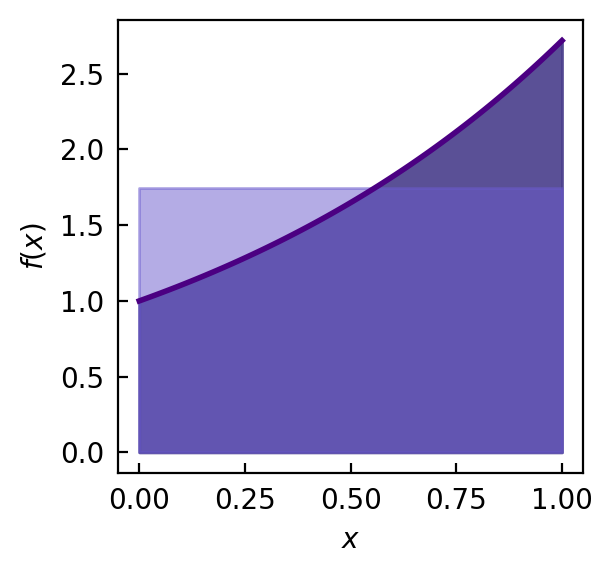

In [4]:
xg = np.linspace(a, b, 100) # generate a finer grid of evenly spaced values

plt.figure(figsize=(3,3))
plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.plot(xg, np.exp(xg), lw=2., color='indigo') # plot sin(x)
# fill_between function creates a shaded area
plt.fill_between(xg, np.zeros_like(xg), np.exp(xg), color='darkslateblue', alpha=0.9) # shade area under sin(x)

# shade area under <f> over [a, b] interval
plt.fill_between(xi, np.zeros_like(xi), (integral/(b-a))*np.ones_like(xi), color='slateblue', alpha=0.5)
plt.show()

Geometrically, what we are doing here is approximating the function with $n_{\rm steps}$ *piecewise-constant* bins (i.e. with a histogram of $n_{\rm steps}$ bins)

In [5]:
#
# prepare a step-wise function for illustration
#
xir = np.repeat(xi,2) # repeat each xi value in the array 
fxir = np.zeros_like(xir)
fxir[::2] = np.exp(xir[::2])
fxir[1::2] = fxir[::2]
dx = (b-a) / (nsteps-1) 
dxhalf = dx * 0.5

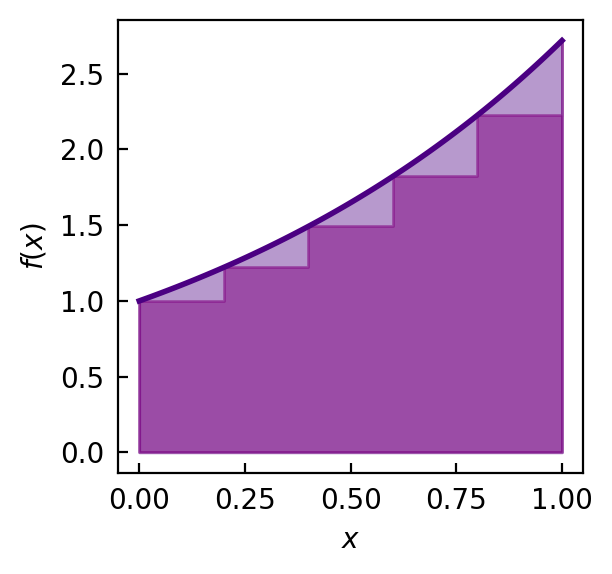

In [6]:
plt.figure(figsize=(3,3)) # define figure
plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.plot(xg, np.exp(xg), lw=2., color='indigo')
plt.fill_between(xg, np.zeros_like(xg), np.exp(xg), color='indigo', alpha=0.4)
plt.fill_between(xir[1:], np.zeros_like(xir[1:]), fxir[:-1], color='purple', alpha=0.5)
plt.show()

We can see that piece-wise constant approximation (purple histogram-like function in the plot above) underestimates area under the curve. 

However, this also hints at a possible way to improve the estimate: instead of piece-wise constant approximation we can construct a *piece-wise linear* one, as shown in the plot below. 

We can use a *piecewise-linear* approximation instead, in which subsequence $x_i$ values by a linear function instead of constant.. The approximation of the function is much better. This means that if sum up areas under the trapezoids formed by the vertices at which function is evaluated, we can approximate the integral much better.  This motivates *the trapezoidal* scheme of numerical integration below. 

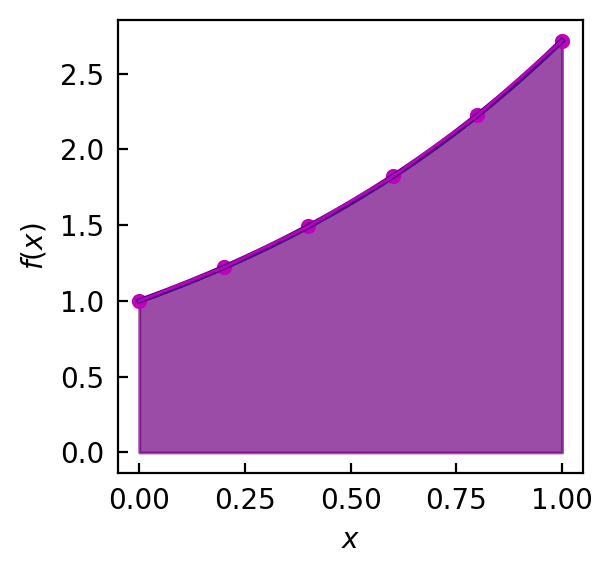

In [7]:
plt.figure(figsize=(3,3))
plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.fill_between(xg, np.zeros_like(xg), np.exp(xg), color='indigo', alpha=0.4)
plt.fill_between(xi, np.zeros_like(xi), np.exp(xi), color='purple', alpha=0.5)
plt.plot(xg, np.exp(xg), lw=2., color='indigo')
plt.plot(xi, np.exp(xi), lw=1., color='m')
plt.scatter(xi, np.exp(xi), s=20., color='m')
plt.show()

### <font color='darkblue'>The trapezoidal scheme

The logic of the method called *trapezoidal integration scheme*, in which integrated function is approximated in each interval using a linear function, can be used to get reasonably accurate numerical integral estimate and easiest to remember. 

Specifically, to evaluate integral of $f(x)$ (area under $f(x)$ for $x\in[a,b]$):

Split the integration interval into $N$ equal-size sub-intervals of size $h=(b-a)/N=x_{i+1}-x_i$. Note that for $N$ intervals, we will need to evaluate the function at $N+1$ points: for example, splitting $[a,b]$ into two sub-intervals requires evaluating the function at three points: $a$, $a+(b-a)/2$, and $b$. 

For convenience, let's denote $f_i = f(x_i)$, $f_{i+1}=f(x_{i+1})$, etc.

Approximate area under $f(x)$ in each interval, $A_i$, of width $h=x_{i+1}-x_i$ can then be approximated by the area $T_i$ of the trapezoid formed by vertices $(x_i, 0)$,  $(x_i, f_i)$, $(x_{i+1}, f_{i+1})$ and $(x_{i+1},0)$:

$$T_i = \frac{1}{2}(f_i + f_{i+1})\, h.$$

The total area under $f(x)$ in the interval $[a,b]$ using $N+1$ function values ($N$ steps) is then:

$$A = \int\limits_a^b f(x)\, dx = \sum\limits_{i=0}^{N-1} A_i \approx \sum\limits_{i=0}^{N-1} T_i= \frac{h}{2}\sum\limits_{i=0}^{N-1}(f_i + f_{i+1}),$$
$$ = h\left[\frac{1}{2}(f_0 + f_{N}) + \sum\limits_{i=1}^{N-1}f_i,\right]$$

Let's check integration with an integral for which we know exact value: for example

$$\int\limits _0^{1}e^x\,dx = e-1 $$

In [8]:
nsteps = 12

a, b, func = 0., 1., np.exp # approximate integral of sin(x) over [0, pi]
hstep = (b - a) / nsteps

# create a grid of evenly spaced x values 
xd = a + np.arange(1,nsteps) * hstep # np.arange creates a vector of values from 0 to nstep-1
# this line computes the integral using trapezoidal integration 
integral = (0.5*(func(a) + func(b)) + np.sum(func(xd))) * hstep

# compute exact integral and fractional error
fexact = np.exp(b) - np.exp(a)
ferr = integral/fexact - 1. # fractional error 
print('fractional error = {:.4g}'.format(ferr))

fractional error = 0.0005786


It is convenient to put this calculation into function that can be used to take integral of any input function. 

$\star$ in <tt>$^\star$args</tt> indicates that what is passed is a *pointer* to memory location of the start of args, not the values of args elements themselves. The trapzd routine simply passes *args to function, which then interprets the content as the input parameters it expects. We don't have to pass anything to <tt>trapzd</tt> as args if function does not require any parameters, but only takes one input - variable on which it depends.

In [9]:
def trapzd(func, a, b, nsteps, *args):
    """
    function implementing trapezoidal integration scheme using
    numpy vector operations
    
    Parameters:
    -----------------------------------------------------------
    func: python function object
          function to integrate, must take numpy arrays as input
    a, b: floats
          limits of the integral
    hstep: float - the size of step to use 
    
    args: parameters to be passed for func, if any 
    
    Returns:
    -------------------------------------------------------------
    value of the estimated int^b_a f(x)dx
    """
    assert(nsteps > 0); assert(a < b)
    
    hstep = (b - a) / nsteps
      
    if nsteps == 1:
        return 0.5*(func(a, *args) + func(b, *args)) * hstep
    else: 
        xd = a + np.arange(1,nsteps) * hstep # np.arange creates a vector of values from 0 to nstep-1
        return (0.5*(func(a, *args) + func(b, *args)) + np.sum(func(xd, *args))) * hstep

In [10]:
# integrate exp(x) from a, b - exact integral = exp(b) - exp(a)
a = 0.; b = 1.
nsteps = 3
trint = trapzd(np.exp, a, b, nsteps)

fexact = np.exp(b) - np.exp(a)
ferr = np.abs(trint/fexact - 1.) # fractional error 
print('fractional error = {:.4g}'.format(ferr))

fractional error = 0.009242


It works! We have a working numerical integration function. 


### <font color='darkblue'>Practical applications and examples

Let's use it to compute something useful like integral of the following function: 

$$d_c =(1+x)\int\limits_0^x \frac{dx}{E(x)}.$$

where $E(x)=\sqrt{a(1+x)^3+b(1+x)^2+c}$, where $a$, $b$, $c$ are constants. 


In [11]:
def dl_func(x, a, b, c):
    return 1.0 / np.sqrt(a*(1.+x)**3 + b*(1.+x)**2 + c)

In [12]:
a, b, c = 0.3, 0., 0.7
args = [a, b, c]

x = 11.09
nsteps = 1000
d_c = (1+x) * trapzd(dl_func, 0., x, nsteps, *args)
print(d_c)

27.263162459370243


Why is this useful? Because if I multiply this number by the speed of light in units of km/s and divide by what's known as the *Hubble constant* in units of km/s/Mpc, $H_0=70$ km/s/Mpc I will get distance $d_L$ to <a href="https://en.wikipedia.org/wiki/List_of_the_most_distant_astronomical_objects">the most distant known galaxy</a> in Megaparsecs (Mpc is short for megaparsec). 

In [13]:
clight = 2.99792458e5 # c in km/s
H0 = 70 # Hubble constant in km/s/Mpc
d_l = d_c * clight / H0

print('distance to galaxy at redshift {:.2f} is {:.2f} Mpc'.format(x, d_l))
print('light would travel this distance in {:.4g} years'.format(1.e6 * d_l/3.24))

distance to galaxy at redshift 11.09 is 116761.29 Mpc
light would travel this distance in 3.604e+10 years


One Megaparsec is million parsecs. One parsec is the distance light travels in about $\approx 3.24$ years and is the amount by which apparent position of a star changes when the Earth moves around the Sun in 6 months time due to change of the location from which we view it.  

How can we check this calculation if we don't know the exact answer?  We can compare to the calculation by a similar function implemented by someone we'd trust. 

<a href="https://www.astropy.org/">Astropy</a> package has a <a href="https://docs.astropy.org/en/stable/_modules/astropy/cosmology/core.html#FLRW">cosmology sub-package</a>, which has many useful functions, including one that computes distance $d_L$.

In [14]:
from astropy.cosmology import LambdaCDM
import astropy.units as u

def d_l_astropy(z, H0, Om0, OmL):
    cosmo = LambdaCDM(H0=H0, Om0=Om0, Ode0=OmL)
    return cosmo.luminosity_distance(z=z) / u.Mpc

In [15]:
Om0 = 0.3; OmL = 0.7; H0 = 70.

d_la = d_l_astropy(x, H0, Om0, OmL)
print('distance_trapezoidal = {:.2f} Mpc; distance_astropy = {:.2f} Mpc'.format(d_l, d_la))

distance_trapezoidal = 116761.29 Mpc; distance_astropy = 116761.06 Mpc


Results are close but not identical. Let's recompute integral using more trapezoidal intervals. 

In [16]:
nsteps = 10000
d_c = (1+x) * trapzd(dl_func, 0., x, nsteps, *args)
d_l = d_c * clight / H0
print('distance_trapezoidal = {:.2f} Mpc; distance_astropy = {:.2f} Mpc'.format(d_l, d_la))

distance_trapezoidal = 116761.06 Mpc; distance_astropy = 116761.06 Mpc


Now trapezoidal result matches astropy's function. 

### <font color='darkblue'>How can we contol the accuracy of integration?

First, let's take a look at how the fractional error of integration changes with the number of intervals (and thus step size) that we use. 

It is convenient to define a "helper" function that integrates function <tt>func</tt> using integration function <tt>int_func</tt> over interval $[a,b]$ for $n_s$ different step sizes so we can see how fractional error changes with step size. 

In [18]:
def compute_integral_steps(func, int_func, a, b, ns, *args):
    nsteps = np.arange(1,ns) # generate a vector of nstep values from 1 to ns-1
    trint = np.zeros(np.shape(nsteps)[0]) # initialize a vector for integration results for each step size

    for i, ns in enumerate(nsteps):
        trint[i] = int_func(func, a, b, 2**nsteps[i], *args) # compute the integral for each step size
     
    return trint, np.abs(b-a)/2**nsteps # return vectors of integration results and step sizes

In [21]:
# integrate exp(x) from a, b - exact integral = exp(b) - exp(a)
a = 0.; b = 1.
ns = 27

trint, hsteps = compute_integral_steps(np.exp, trapzd, a, b, ns)

fexact = np.exp(b) - np.exp(a)
ferr = np.abs(trint/fexact - 1.) # fractional error 

It takes a few seconds to run for $2^{30}$ intervals, but we are getting integral with fractional accuracy of $\approx 3\times 10^{-16}$!

Let's plot the fractional error as a function of step size $h$. 

Another helper function for generic plots that include a line and (optionally) a set of points.

Now let's plot fractional error vs step size $h$. The plot below shows that fractional error increases as square of step size with increasing $h$ (line in the plot shows $\propto h^2$

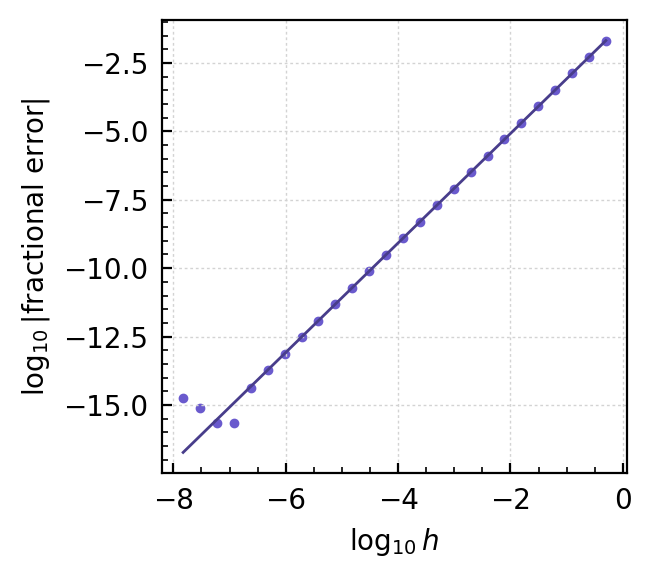

In [22]:
from codes.plotting import plot_line_points

#model is ferr ~ h^2, we normalize it to the size of error for first step size in the sequence:
ferr_model = ferr[0] * (hsteps/hsteps[0])**2

plot_line_points(np.log10(hsteps), np.log10(ferr_model), 
                 xlabel=r'$\log_{10}\,h$', ylabel = r'$\log_{10}\,\vert\rm fractional\ error\vert$',
                 xp=np.log10(hsteps), yp=np.log10(ferr), points=True, grid=True, psize=25., figsize=3)

### <font color='darkblue'>The origin of the "floor" in the fractional error at $\approx 10^{-15}-10^{-16}$

In the plot above we can see that fractional error decreases as $\propto h^2$, but at the smallest $h$ values it stops decreasing and actually starts to increase. 

This is because <a href="https://en.wikipedia.org/wiki/Double-precision_floating-point_format">a finite number of bits</a> (64) is used to represent floating point numbers in the <a href="https://en.wikipedia.org/wiki/IEEE_754-2008_revision">IEEE-754</a> standard used in Python and other languages.



In [23]:
import sys
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


The spacing between floating numbers around a floating number $x$ will be $\approx 2\varepsilon\vert x\vert\approx 2.2\times 10^{-16}\vert x\vert$. 

*Some floating point numbers can be represented exactly (if they need $\leq 52$ bits to represent their fraction), while many other need to be* **rounded off.** 

Calculations with numbers that can be represented exactly are more accurate, but rounded off numbers are generic and cannot be avoided. 

This limited representable difference is the source of **roundoff errors** in numerical calculations

In [24]:
eps = 1.0 
i = 0 # start at -1 so first iteration will correspond to i=0

while 1.0 + eps != 1.0:
    eps = eps / 2
    i = i + 1

print(i, eps)
print(1.+eps)

53 1.1102230246251565e-16
1.0


In [25]:
print(np.finfo(float).eps)

2.220446049250313e-16


In [28]:
# however... I have two floating point numbers like this. Can we get their difference?
a = 1.; b = 2e-16

### <font color='darkblue'>Why does the fractional error of the trapezoidal integration scale as $\propto h^2$?
### <font color='darkblue'>Or does it always?

In [30]:
def sin_plus_1(x):
    return np.sin(x) + 1.

First, let's redo the integral of sin(x), but with a different 


In [31]:
a = 0.; b = 2.*np.pi 
ns = 5

trint, hsteps = compute_integral_steps(sin_plus_1, trapzd, a, b, ns)

fexact = b - a - np.cos(b) + np.cos(a)
ferr = np.abs(trint/fexact - 1.)

In [32]:
print(fexact, trint)
print(ferr)

6.283185307179586 [6.28318531 6.28318531 6.28318531 6.28318531]
[0. 0. 0. 0.]


Trapezoidal integration function returns answer *accurate to machine precision* for *all* values of step size!

Then consider the following integration function that does trapezoidal integration with two steps $h$ and $h/2$ and combines results in a specific way...

In [33]:
def r1(func, a, b, nsteps):
    return (4*trapzd(func, a, b, 2*nsteps) - trapzd(func, a, b, nsteps)) / 3

def r2(func, a, b, nsteps):
    return (16*r1(func, a, b, 2*nsteps) - r1(func, a, b, nsteps)) / 15

def r3(func, a, b, nsteps):
    return (64*r2(func, a, b, 2*nsteps) - r2(func, a, b, nsteps)) / 63

In [39]:
# integrate e^x from a, b - exact integral = e^b - e^a
a = 0.; b = 1.
ns = 15

fexact = np.exp(b) - np.exp(a)
print(fexact)
trint, hsteps = compute_integral_steps(np.exp, r1, a, b, ns)

ferr = np.abs(trint/fexact - 1.)

1.718281828459045


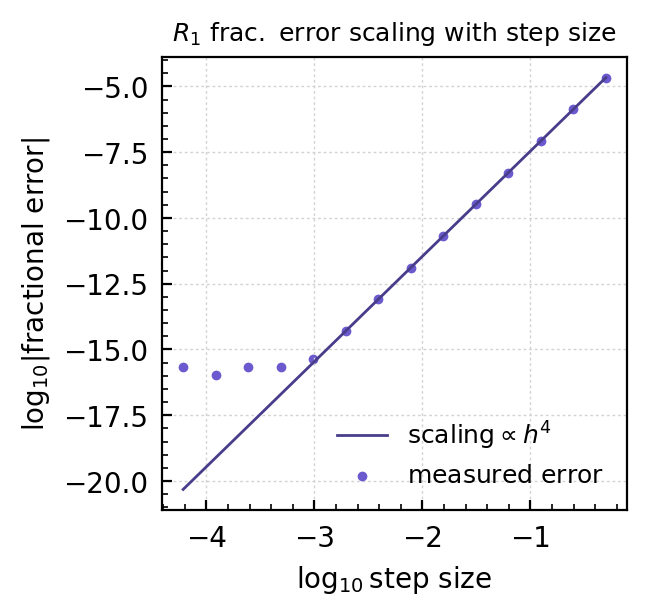

In [41]:
#model is ferr ~ h^n, we normalize it to the size of error for first step size in the sequence:
n = 4
ferr_model = ferr[0] * (hsteps/hsteps[0])**n

plot_line_points(np.log10(hsteps), np.log10(ferr_model), 
                 xlabel=r'$\log_{10}\,\rm step\ size$', ylabel = r'$\log_{10}\vert\rm fractional\ error\vert$',
                 xp=np.log10(hsteps), yp=np.log10(ferr), points=True, 
                 legend=r'${\rm scaling} \propto h^%d$'%n, plegend = r'$\rm measured\ error$',
                 legendloc = 'lower right', psize=25, 
                 plot_title=r'$R_1\ \rm frac.\ error\ scaling\ with\ step\ size$',
                 grid=True, figsize=3, figsave='fracerr_r1.pdf')

In [47]:
ns = 12

trint, hsteps = compute_integral_steps(np.exp, r2, a, b, ns)

ferr = np.abs(trint/fexact - 1.)

C:\Users\akrav\AppData\Local\Temp\ipykernel_29312\3017943118.py:7: RuntimeWarning: divide by zero encountered in log10
  xp=np.log10(hsteps), yp=np.log10(ferr), points=True,


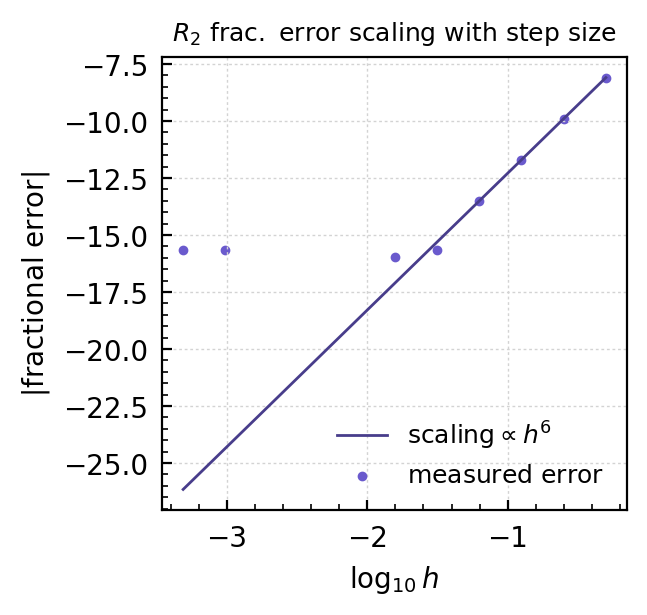

In [48]:
#model is ferr ~ h^2, we normalize it to the size of error for first step size in the sequence:
n = 6
ferr_model = ferr[0] * (hsteps/hsteps[0])**n

plot_line_points(np.log10(hsteps), np.log10(ferr_model), 
                 xlabel=r'$\log_{10}\,h$', ylabel = r'$\vert\rm fractional\ error\vert$',
                 xp=np.log10(hsteps), yp=np.log10(ferr), points=True,
                 legend=r'${\rm scaling} \propto h^%d$'%n, plegend = r'$\rm measured\ error$',
                 legendloc = 'lower right', psize=25, 
                 plot_title=r'$R_2\ \rm frac.\ error\ scaling\ with\ step\ size$',
                 grid=True, figsize=3)

We don't have to stop there and can continue this. After $m$ such steps, the new scheme at a step $m+1$ can be formed as 
$$
R_{m+1}(h)=\frac{4^{m+1} R_{m}(h/2)-R_{m}(h)}{4^{m+1}-1}.
$$

where $R_0(h)=T(h)$ is the integral estimate using trapezoidal scheme evaluated with step $h$. This trick is called the Romberg integration method. 


It works by successive cancellation of the leading terms in the truncation errors, as can be seen in the section on Romberg below (optional for undergraduate students). 

This method was proposed for numerical integration by German-Norwegian mathematical physicist <a href="https://en.wikipedia.org/wiki/Werner_Romberg">Werner Romberg</a> (got his PhD in Munich in 1933 working with Arnold Sommerfeld) in 1955, but became popular in 1960s with the spread of computers.  

<center>
<img width=300 src="https://astro.uchicago.edu/~andrey/classes/a211/img/Werner_Romberg.jpg"></img>
Werner Romberg (1909-2003)
</center>

Werner Romberg had an unusual life and career. For political reasons he fled Germany in 1937,
first to Ukraine and then to Norway, where in 1938 he joined the University of Oslo. He spent the war years in
Sweden and then returned to Norway. In 1949 he joined the Norwegian Institute of Technology in Trondheim. He returned to Germany only in 1968, when he took a Professor position at the University of Heidelberg.

## Material below is optional for undergraduate students. 

### <font color='darkblue'>Algebra showing that $R_1(h)$ is equivalent to approximating $f(x)$ with a quadratic function over integration sub-interval (needs to be fixed)
    
For example, consider $R_1(h)$ on a single sub-interval $[x_{i}, x_{i+1}]$ of length $h={x_{i+1} - x_i}$ of the entire integration interval. Let's denote mid-point of this sub-interval $x_{i+1/2}$ and function values at all three points as $f_i, f_{i+1/2}, $f_{i+1}$. Then 

$$T_i(h) = \frac{1}{2}\, \left(f_{i} + f_{i+1}\right) h$$

Over this same interval during computation of $T(h/2)$ we compute the area as the sum of two sub-intervals 

$$T_h\left(\frac{h}{2}\right) = \left(f_{i} + f_{i+1/2}\right)\,\frac{h}{4} + \left[f_{i+1/2} + f_{i+1}\right]\,\frac{h}{4}$$

So 

$$R_1(h) = \frac{1}{3}\left[4T\left(\frac{h}{2}\right) - T(h)\right] = \frac{h}{6}\,\left(f_i + 4f_{i+1/2} + f_{i+1}\right)$$

If we had to find an interpolating quadratic function $a(x-x_i)^2 + b(x-x_i) + c$ that goes through $f_i, f_{i+1/2}, f_{i+1}$ exactly, then $c=f_i$, and

$$ah^2/4 + bh/2 + c=f_{i+1/2}$$
$$ah^2 + bh + c = f_{i+1},$$ 

which gives $b=(4f_{i+1/2}-f_{i+1})/h$ and 

$$a= \frac{1}{h^2}\,\left(2f_{i+1}-4f_{i+1/2}+2f_i\right).$$ 

So the integral 

$$\int\limits_{x_i}^{x_{i+1}} \left[a(x-x_i)^2 + b(x-x_i) + c\right]\, dx = \left\{x-x_i\rightarrow \tilde{x}\right\} =\int\limits_0^h \left[a\tilde{x}^2 + b\tilde{x} + c\right]\, d\tilde{x} = a\frac{h^3}{3} + b\frac{h^2}{2} + ch, $$
which is equal to
$$-\frac{4}{18}\, (4f_{i+1/2}-f_{i+1})h + \frac{4}{9}(f_{i+1}-f_{i+1/2})h + (4f_{i+1/2}-f_{i+1})\,\frac{h}{2} + f_i h $$


### <font color='darkblue'>Truncation error of the trapezoidal scheme
    
To understand scalling of the fractional error of the trapezoidal scheme (and many other numerical schemes) it is critical to know the Taylor expansion of functions.  

### <font color='darkblue'>The Taylor series expansion 

Consider <a href="https://www.mathsisfun.com/algebra/taylor-series.html">Taylor series expansion</a> of $f(x)$ arond $x_0$:
$$f(x) = \sum\limits^\infty_{n=0} \frac{f^{(n)}(x_0)(x-x_0)^n}{n!}=f(x_0)+f^\prime(x_0)\,(x-x_0)+\frac{1}{2}f^{\prime\prime}(x_0)\,(x-x_0)^2 + \frac{1}{6}f^{(3)}(x_0)\,(x-x_0)^3+ \mathcal{O}[(x-x_0)^4].$$

The term $\mathcal{O}[(x-x_0)^4]$ is the standard shorthand for ``and terms of order 4 and higher''. If we neglect terms above certain order, we are no longer guaranteed to represent $f(x)$ exactly.

For example, to linear order: 
$$f(x) \approx f(x_0)+f^\prime(x_0)\,(x-x_0).$$

The difference between $f(x)$ and approximation using limited number of terms, such as $f(x_0)+f^\prime(x_0)\,(x-x_0)$, is called *truncation error*. 

The code below computes and plots the sum of the 1, 2, 3, and 4 Taylor series for $f(x)=e^x$ around $x_0=1$ and compares them to $e^x$. You can see that with 4 of the first terms of the Taylor series we already start to approximate $e^x$ quite well. 

It is possible to use the Taylor expansion to formally derive the trapezoidal integration scheme along with all of its *truncation error terms*. 

The derivation is not too difficult to follow, but it is long and is somewhat tedious (took me 3 pages of algebra to do this). It gives the <a href="https://en.wikipedia.org/wiki/Euler%E2%80%93Maclaurin_formula#Approximation_of_integrals">Euler-Maclaurin formula</a>.

Denoting step size $h=x_{i+1}-x_i$, $x_i=a+ih$, and $f_i=f(x_i)$, $f_{i+1}=f(x_{i+1})$ etc., this formal derivation shows that integral over sub-interval $[x_i,x_{i+1}]$ is

$$
A_i =\int\limits_{x_i}^{x_{i+1}}f(x)dx = \frac{h}{2}\left[f_i+f_{i+1}\right] + \frac{h^2}{12}\,\left[f^{\prime}_i-f^{\prime}_{i+1}\right] -  \frac{h^4}{720}\,\left[f^{\prime\prime\prime}_i-f^{\prime\prime\prime}_{i+1}\right]+\mathcal{O}(h^6). 
$$

Note that the first term corresponds to the evaluation of area in sub-interval using the area of trapezoid, while the rest of the terms contain *only even powers of $h$*.

### <font color='darkblue'>Truncation error of the composite trapezoidal integration 

If we now combine the individual areas into total integral (note that $f_0=f(a)$, $f_N=f(b)$, etc.:

$$A = \int\limits_a^b f(x)dx = \sum\limits_{i=0}^{N-1} A_i = \frac{h}{2}\left[f(a)+f(b)\right] + h\sum\limits_{i=1}^{N-1}f_i + \frac{h^2}{12}\,\left[f^{\prime}(a)-f^{\prime}(b)\right] -  \frac{h^4}{720}\,\left[f^{\prime\prime\prime}(a)-f^{\prime\prime\prime}(b)\right]+\mathcal{O}(h^6).
$$

or $A = T(h) +{\rm truncation\ error\ terms\ of\ the\ trapezoidal\ scheme}$. 

Thus, the error of the trapezoidal scheme is

\begin{eqnarray}
\epsilon = T(h)-A &=& \frac{h^2}{12}\,\left[f^{\prime}(a)-f^{\prime}(b)\right] -  \frac{h^4}{720}\,\left[f^{\prime\prime\prime}(a)-f^{\prime\prime\prime}(b)\right]+\mathcal{O}(h^6)\\
&=&e_1h^2 + e_2h^4 + \mathcal{O}(h^6+\ldots +\mathrm{only\ even\ powers\ of\ } h).
\end{eqnarray}

* Note that if the function derivatives of odd orders are equal at the ends of the integration interval: $f^{\prime}(a)=f^{\prime}(b)$, $f^{\prime\prime\prime}(a)=f^{\prime\prime\prime}(b)$ etc., the truncation error is zero! 

Question: For what type of functions and integration interval these conditions will be generically true? 

Answer: periodic functions integrated over a period. In this case, trapezoidal scheme provides result with machine accuracy. 

* If we know analytic expressions for the function derivatives, we can use the above equation (or its full version with all the terms, called the <a href="https://en.wikipedia.org/wiki/Euler%E2%80%93Maclaurin_formula#Approximation_of_integrals">Euler-Maclaurin formula</a>) to compute value integral for such function to machine precision. 

* Even if we don't know the derivatives, the knowledge of the structure of the error terms can be exploited to obtain results of much higher accuracy. This is done in the *Romberg integration method*. 

## <font color='darkblue'>Romberg integration method

#### This section is optional for undergraduate students

We showed that the integral can be expressed as  
$$
A=\int\limits^b_af(x)dx=T(h)+ e_1 h^2 + e_2 h^4 + \mathcal{O}(h^6),
$$
where $e_1$, $e_2$, ... are some constants that depend on derivatives of $f(x)$ at $x=a$ and $x=b$. 

However, we can also express it using trapezoidal scheme with a twice smaller step size:
$$
A=\int\limits^b_af(x)dx=T\left(\frac{h}{2}\right)+ e_1 \left(\frac{h}{2}\right)^2 + e_2 \left(\frac{h}{2}\right)^4 + \mathcal{O}(h^6)
=T\left(\frac{h}{2}\right)+ \frac{e_1}{4}\,h^2 + \frac{e_2}{16}\,h^4 + \mathcal{O}(h^6).
$$


If we multiply the second equation by 4 and subtract the first equation from the result, we get 

$$3A = 4T\left(\frac{h}{2}\right) - T(h) -\frac{3e_2}{4}\,h^4 + \mathcal{O}(h^6)$$

or 

$$A = \frac{4T\left(h/2\right) - T(h)}{3} -\frac{e_2}{4}\,h^4 + \mathcal{O}(h^6).$$

Let's denote $R_0(h) = T(h)$, the equation above shows that construct

$$R_1(h) =  \frac{4R_0\left(h/2\right) - R_0(h)}{3} = A +\frac{e_2}{4}\,h^4 + \mathcal{O}(h^6),$$

has leading error term of $\propto h^4$ - that is the integration scheme $R_1(h)$ is *4th-order accurate*. 

In fact, $R_1(h)$ scheme is known as the *Simpson integration scheme.* This explains the second puzzling integration accuracy result that we saw. 

The Simpson scheme is so called because the method is most often credited to the English mathematician Thomas Simpson (1710–1761). However, famous astronomer Johannes Kepler used similar formulas over 100 years prior, and this scheme is often called Kepler's rule, or Keplersche Fassregel (Kepler's barrel rule), especially in German literature.

We can use the same trick and eliminate the leading truncation error term of $R_1(h)$ as follows:

$$R_2(h) = \frac{16R_1(h/2)-R_1(h)}{15} + e_3h^6 +\mathcal{O}(h^8),$$

which is known as the Boole integration scheme and is *6th order accurate.*

The scheme is credited to English mathematician <a href="https://en.wikipedia.org/wiki/George_Boole">George Boole</a> (1815-1864) of the *Boolean logic* fame, and is sometimes mistakenly called Bode's rule. 

We don't have to stop there and can continue this. After $m$ such steps, the new scheme at a step $m+1$ can be formed as 
$$
R_{m+1}(h)=\frac{4^{m+1} R_{m}(h/2)-R_{m}(h)}{4^{m+1}-1}.
$$

The leading truncation error term of the scheme at step $m$ is $2(m+1)$:

$$A = R_{m}(h) + \mathcal{O}[h^{2(m+1)}].$$

We can thus use this *formula* to compute a series of increasingly accurate integral estimates by computing $R_0$, $R_1$, $R_2$,... up to $R_m$, where $m$ is some number.  

### How do we know when to stop? (i.e. up to what $m$ to compute?)

In general, we do not know what the exact value of the integral, to which we could compare as in the test cases above.

* We may choose to keep increasing $m$ until the fractional difference between $R_m$ and $R_{m-1}$ ($\vert 1-R_{m-1}/R_m\vert$) becomes smaller than $1/2^{52}$. 

* We may choose to keep increasing $m$ until the absolute difference between $R_m$ and $R_{m-1}$ is smaller than some threshold ($\vert R_{m-1}-R_m\vert<\rm atol$) or fractional difference is smaller than some threshold ($\vert 1-R_{m-1}/R_m\vert<\rm rtol$). 

Note that in the latter case we should guard against cases when $R_m=0$. 

The general method of improving accuracy and order of the scheme by eliminating leading truncation error terms was proposed by English mathematician, physicist, meteorologist, psychologist and pacifist Lewis Fry Richardson in 1922, when he attempted pioneering computations of air flows using a system of differential equations for weather prediction. This general approach is known as *Richardson's extrapolation.*
<p>
<center>
<img width=300 src="https://astro.uchicago.edu/~andrey/classes/a211/img/Lewis_Fry_Richardson.png"></img>
Lewis Fry Richardson (1881-1953)
</center>

### Limitations

Romberg integration (or generally Richardson's extrapolation) is a powerful approach that works in majority of cases one encounters in practice (we mostly deal with reasonably behaving functions), but it has limitations for certain functions.

* The truncation error terms depend on odd derivatives at the boundary. If any of these are large  (for example, if function is discontinuous), the accuracy can degrade drastically. 

Details depend on specific cases. A general rule is that if you get subpar results with the Romberg integration, examine the function you are integrating (plot it, understand its behavior). You may need to be creative in how to handle integration in such difficult cases by splitting integration into sub-intervals, changing variables of integration etc.

For example, it is sometimes advantageous to integrate in $d\ln x$ rather than in $dx$:

$$\int f(x) dx = \int f(x) x d\ln x.$$

### SciPy's function <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html"><tt>scipy.integrate.romberg</tt></a> 

implements Romberg's integration method. We will use it in calculations armed with the knowledge of what it actually does. You will have an option to implement Romberg integration in hw 4 assignment. 